# MTH4000 Programming in Python I - Lecture 9
Module Organisers: Dr Matthew Lewis and Prof. Thomas Prellberg

We will now turn towards working with arrays in Python. Solving systems of linear equations is an essential part of mathematics. More about this in Linear Algebra next semester, For now it suffices to say that there are many Linear Algebra functions available in Python. You will find these functions in `scipy.linalg`, with the relevant data type `array` provided by `numpy`. So let us start with importing the relevant modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Nested Lists, Arrays, Matrices, and All That

### Array data type

The module `numpy` provides the data type `ndarray` for $n$-dimensional arrays. In what follows, we will mainly consider one- and two-dimensional arrays.

**A word of caution:** Python also knows a type `array` as part of the module `array`, and also a (deprecated) type `matrix` as part of the module `numpy`. Mixing data of these different types is a bad idea, and I *strongly* urge you to stay with the array type `ndarray` defined in `numpy`.

With the function `numpy.array` we can create an array from a range, tuple, or (nested) list.

In [2]:
l=[0,1,2,3,4,5]
a=np.array(l)
print(l)
print(a)

[0, 1, 2, 3, 4, 5]
[0 1 2 3 4 5]


You see that when printed out, this looks slightly differently than for lists. Let us repeat this for two-dimensional arrays, where the array is printed out like a matrix.

In [3]:
l=[[0,1,2],[3,4,5]]
a=np.array(l)
print(l)
print(a)

[[0, 1, 2], [3, 4, 5]]
[[0 1 2]
 [3 4 5]]


As usual, we can query the data type with `type()`.

In [4]:
type(a)

numpy.ndarray

While arrays look like nested lists, they have some more restrictive features when compared with nested lists, to enable faster access and computation. For example, numpy attempts to keep the data types homogeneous as in the next example, where the integer `2` got replaced by the floating point `2.`.

In [5]:
a_int=np.array([[0,1,2],[3,4,5]])
a_float=np.array([[0,1,2.],[3,4,5]])
print(a_int)
print(a_float)

[[0 1 2]
 [3 4 5]]
[[0. 1. 2.]
 [3. 4. 5.]]


We can query the *data* type of the array by using the `.dtype` attribute

In [6]:
a_int.dtype, a_float.dtype

(dtype('int32'), dtype('float64'))

Note that data types of array entries differ from standard Python data types, again mainly to make computations easier and faster to perform. You can find out more [here](https://docs.scipy.org/doc/numpy/user/basics.types.html).

### Creating Arrays

We have already created arrays by converting a (nested) list to an array by using the function `numpy.array()`. Early on in the lectures I already sneaked in a one-dimensional array when I used the function `numpy.linspace()`. You may recall I used it to create evenly spaced $x$-coordinates for plotting. What I really did was create an array with this function.

In [7]:
a=np.linspace(0,10,6)
print(a)
type(a)

[ 0.  2.  4.  6.  8. 10.]


numpy.ndarray

We can also create arrays pre-filled with zeros, ones, or any other value using `numpy.zeros()`, `numpy.ones()`, or `numpy.full()`, respectively.

In [8]:
a=np.zeros(4)
print(a)

[0. 0. 0. 0.]


In [9]:
a=np.zeros((3,5))
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [10]:
a=np.ones((5,3))
print(a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [11]:
a=np.full((2,4),3)
print(a)

[[3 3 3 3]
 [3 3 3 3]]


Finally, we can create a square shaped array with ones on the diagonal (i.e. an identity matrix) using the function `numpy.eye()`.

In [12]:
a=np.eye(7)
print(a)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


### Dimension, Shape, and Size

The attribute `.ndim` returns the dimension of an array, and the attribute `.shape` returns the tuple describing the number of rows, columns, etc., and the attribute `.size` returns the total number of entries

In [13]:
a=np.zeros(10)
print(a)
print(a.ndim,a.shape,a.size)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10,) 10


In [14]:
a=np.array([[1,2,3,4,5],[6,7,8,9,10]])
print(a)
print(a.ndim,a.shape,a.size)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
2 (2, 5) 10


In [15]:
a=np.full((3,2,4),np.exp(1))
print(a)
print(a.ndim,a.shape,a.size)

[[[2.71828183 2.71828183 2.71828183 2.71828183]
  [2.71828183 2.71828183 2.71828183 2.71828183]]

 [[2.71828183 2.71828183 2.71828183 2.71828183]
  [2.71828183 2.71828183 2.71828183 2.71828183]]

 [[2.71828183 2.71828183 2.71828183 2.71828183]
  [2.71828183 2.71828183 2.71828183 2.71828183]]]
3 (3, 2, 4) 24


### Slicing and Indexing

Indexing and slicing of arrays works just as for plain lists, including the use of negative indices. Numpy's indexing is however more versatile. For example, not only `a[i][j]`, but also `a[i,j]` is allowed.

In [16]:
a=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(a)
print(a[2,1])
print(a[2][1])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
8
8


Accessing rows is also just as with lists, and accessing columnns also works (as opposed to lists, where this concept does not make sense). We simply put placeholders `:` into the position of the index corresponding to the data that we want to extract.

In [17]:
a=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(a)
print(a[2])
print(a[2,:])
print(a[:,1])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[7 8 9]
[7 8 9]
[ 2  5  8 11]


Note that the last result is also given as a one-dimensional array, i.e. a row. If we want an array that resembles a column, we can use `numpy.reshape()`.

In [18]:
print(a[:,1])
print(np.reshape(a[:,1],(4,1)))

[ 2  5  8 11]
[[ 2]
 [ 5]
 [ 8]
 [11]]


The indexing extends to extracting a subarray (slicing).

In [19]:
a=np.reshape(np.array(range(100)),(5,20))
print(a)
print()
print(a[2:4,10:15])

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]

[[50 51 52 53 54]
 [70 71 72 73 74]]


In the above I have used the `numpy.reshape()` function to change a linear array with $100$ entries to a square array of shape $5\times 20$. 

### Array Operations

Arithmetic operators on arrays apply **elementwise**. A new array is created and filled with the result.
In particular `*` multiplies elementwise (a process for matrices also known as the Hadamard product), which has nothing to do with a product of matrices which you will encounter next semester.

In [20]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.eye(3)
c=np.ones((3,3))
print(a)
print(b)
print(c)
print('a+b')
print(a+b)
print('a*b')
print(a*b)
print('b/a')
print(b/a)
print('a**2')
print(a**2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
a+b
[[ 2.  2.  3.]
 [ 4.  6.  6.]
 [ 7.  8. 10.]]
a*b
[[1. 0. 0.]
 [0. 5. 0.]
 [0. 0. 9.]]
b/a
[[1.         0.         0.        ]
 [0.         0.2        0.        ]
 [0.         0.         0.11111111]]
a**2
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


There are many functions in `numpy` that work on arrays, such as `numpy.min` or `numpy.sum`. The nice thing is that we can also apply these commands along the rows or columns.

In [21]:
print(a)
print(np.sum(a))
print(np.sum(a,axis=0))
print(np.sum(a,axis=1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
45
[12 15 18]
[ 6 15 24]


Note that the last result is also given as a one-dimensional array, i.e. a row. If we want an array that resembles a column, we can again use `numpy.reshape()`.

In [22]:
print(np.sum(a,axis=1))
print(np.reshape(np.sum(a,axis=1),(3,1)))

[ 6 15 24]
[[ 6]
 [15]
 [24]]


Note the difference between `np.sum` and `sum`: `np.sum` sums all the entries, `sum` sums up the columns.

In [23]:
print(np.sum(a))
print(sum(a))
print(np.sum(a,axis=0))

45
[12 15 18]
[12 15 18]


One operation that is sometimes useful is to transpose arrays, i.e. swap their indices. We can visualise this as reflection along the diagonal with equal indices (i,i).

In [24]:
a=np.array([[1,2],[3,4]])
print(a)
print(a.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


### numpy and matplotlib

Let us briefly revisit the plotting we encountered in week 1. I used numpy arrays to define one-dimensional arrays for plotting with `np.arange()` or `np.linspace()`. And of course I swept the details under the rug.

In [25]:
x=np.linspace(-5*np.pi,5*np.pi,200)
print(type(x))

<class 'numpy.ndarray'>


Element-wise operations allowed us to write easily readable code as `x*x` or `np.cos(x)`, without having to resort to list comprehensions.

In [26]:
y=np.sin(x)/x
print(type(y))

<class 'numpy.ndarray'>


This gave us quick results in week 1, without having to understand the code in detail.

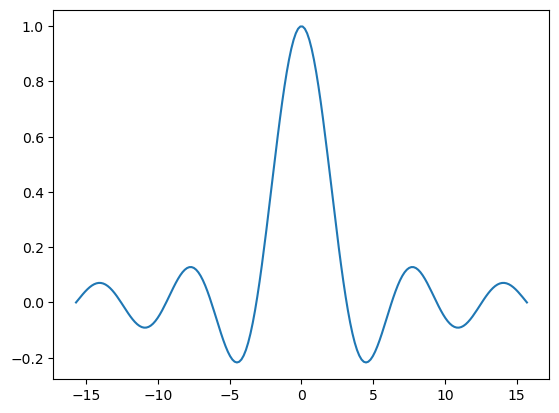

In [27]:
x=np.linspace(-5*np.pi,5*np.pi,200) # list of 200 equally spaces x-values from -5pi to 5pi
plt.plot(x,np.sin(x)/x)             # plotting sin(x)/x versus x
plt.show()

### Back to File I/O: Reading and writing numpy data

If your data is in a *standard* format, it is much easier to work with file input/output. For example, a single numpy array can be read and written with the functions `numpy.loadtxt()` and `numpy.savetxt()`. The nice thing is that you don't have to worry about opening or closing files, it is done for you. You just have to specify the filename and the array.

In [28]:
A=np.random.random((5,3))
print(A)
np.savetxt("test.txt",A)

[[0.7756649  0.4872517  0.73490179]
 [0.87540451 0.52088132 0.34483641]
 [0.69313726 0.81976397 0.23411112]
 [0.83515158 0.75091636 0.7544699 ]
 [0.97284232 0.36086654 0.28185267]]


As this is a plain text file, we can see what it looks like using `readlines()`.

In [29]:
with open("test.txt",'r') as f:
    for line in f:
        print(line.rstrip())

7.756649033250720970e-01 4.872516963303774595e-01 7.349017925697006737e-01
8.754045113542617829e-01 5.208813233013184218e-01 3.448364101254828284e-01
6.931372565222174709e-01 8.197639740695322752e-01 2.341111157977757706e-01
8.351515847910234713e-01 7.509163552051965063e-01 7.544699041296931696e-01
9.728423219110010622e-01 3.608665428526139918e-01 2.818526667501942695e-01


Let's load this as a new array instead.

In [30]:
B=np.loadtxt("test.txt")
print(B)

[[0.7756649  0.4872517  0.73490179]
 [0.87540451 0.52088132 0.34483641]
 [0.69313726 0.81976397 0.23411112]
 [0.83515158 0.75091636 0.7544699 ]
 [0.97284232 0.36086654 0.28185267]]


Element-wise comparison shows equality of both arrays.

In [31]:
print(A==B)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


The advantage of the method described here is that the data is stored as a plain text file, which you can easily read. See [here](https://www.python-course.eu/numpy_reading_writing.php) for alternatives involving e.g. binary data.

## An application: solving systems of linear equations.

Next semester you will learn about Linear Algebra, which can help with solving systems of $n$ linear equations in $n$ unknowns.

For $n=2$, these are equations such as
\begin{align*}
3x_0+2x_1&=6\\
-x_0+4x_1&=2
\end{align*}

While this is still easy to solve for $n=2$ (or $3$), computers can do this quickly for much larger values of $n$.

We collect all the coefficients on the left-hand-side in a $2\times 2$-array $A$:
$$
A=\left(\begin{matrix} 3&2\\ -1&4\end{matrix}\right)
$$

The coefficients on the right-hand side form a one-dimensional array $b=(6,2)$ of size $2$, and the unknowns $x_0$ and $x_1$ similarly form a one-dimensional array $x=(x_0,x_1)$ of size $2$.

Let's do this in Python:

In [32]:
A=np.array([[3,2],[-1,4]])
print(A)
print()
b=[6,2]
print(b)

[[ 3  2]
 [-1  4]]

[6, 2]


Having defined $A$ and $b$, there is now a function in the linear algebra module that we can use to find $x$.

In [33]:
x=la.solve(A,b)
print(x)

[1.42857143 0.85714286]


We easily identify $x_0=10/7$ and $x_1=6/7$, and we can check
\begin{align*}
3\frac{10}7+2\frac67&=\frac{42}7=6\\
-\frac{10}7+4\frac67y&=\frac{14}7=2
\end{align*}
as required.

But why stop at $n=2$? Let's generate some larger example for, say, $n=6$.

In [34]:
A=np.random.normal(size=(6,6))
b=np.random.normal(size=(6))
print(A)
print()
print(b)

[[ 7.92081560e-01  1.46183869e+00 -9.36352191e-01  1.24008461e+00
   7.18259129e-02 -8.62034459e-01]
 [-3.11051099e-02  1.58306436e+00 -1.88476527e+00  1.28297149e+00
   3.87720237e-01 -1.49246244e-02]
 [-9.42513131e-01 -1.03202762e+00  3.89188118e-01  1.49933547e+00
   3.91341685e-01  3.59161975e-01]
 [ 1.87428055e-03  3.19048784e-01 -5.68184266e-01 -1.71505692e-01
  -1.38368526e+00 -3.93314912e-01]
 [-1.26811424e+00 -7.69041147e-01  1.29680646e+00  1.02949001e+00
   1.40659022e-01 -6.21963679e-01]
 [ 7.22327775e-01 -2.50934561e+00  2.04269737e-01 -5.16400363e-02
   1.38614189e+00  6.94833784e-01]]

[-0.95110564 -0.19880827 -1.87060581 -1.15895635 -1.33371485 -0.28893463]


Let us solve for $x$.

In [35]:
x=la.solve(A,b)
print(x)

[-0.3522157   0.69335367  0.02422359 -1.31897957  1.11508739  0.12465556]


To check the validity, we use an operation called matrix multiplication (more on this next semester). Python does this with the symbol `@`. `x=la.solve(A,b)` solves the matrix equation $Ax=b$, so we need to compute $Ax$ and compare it to $b$.

In [36]:
print(A@x)
print()
print(b)

[-0.95110564 -0.19880827 -1.87060581 -1.15895635 -1.33371485 -0.28893463]

[-0.95110564 -0.19880827 -1.87060581 -1.15895635 -1.33371485 -0.28893463]


This seemed to have worked very well.

Of course I have ignored many issues here: you presumably know already that a system of linear equations may not have any solution, or perhaps more than one, for example. Again, I shall refer to the Linear Algebra module next term.

## Pandas

When it comes to Python, Pandas are not cuddly animals. Rather, Pandas is the name of the *Python Data Analysis Library*, and if you want to do modern data analytics with Python, you will hardly manage to avoid [Pandas](https://pandas.pydata.org/). Its [DataFrame](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html) object is becoming a standard for spreadsheet data. For example, there are ready-made tools available to directly access statistical or financial data from the web. These services are provided by the World Bank, OECD, Eurostat, Nasdaq, and many more.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## A case study: Atmospheric Carbondioxide Data

To show you the strength of Pandas, we present a brief analysis of carbondioxide data from the Mauna Loa observatory on Hawaii (with a resit project focussing on Methane data), readily available online.

This shows how easy it is to

- access live data from the web
- work with spreadsheets in Python (who needs Excel?)
- utilise powerful functionality from special modules (or do it even better from scratch)
- present data in a visually appealing way

The data is available as a csv document: https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv 

This is the same file format (comma separated values) that Excel can read, so we can just open it directly to have a peek. We see some explanation in the header, followed by neatly arranged data in labelled columns.

But we wish to open it in Python. Except for telling Python where to start reading (we need to skip the top rows and start with the row that has the column labels), we can simply use `pd.read_csv(url_string)`.

In [38]:
# note the need to skip the top rows (view the file in excel to see the content)
data=pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv",skiprows=35)

So what does this file look like? We can easily look at a neatly formatted output!

In [39]:
data

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.39
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.05
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.59
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.64
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06
...,...,...,...,...,...,...,...,...,...
2579,2023,10,22,2023.8068,418.91,6,416.19,394.23,141.91
2580,2023,10,29,2023.8260,419.05,7,416.41,394.47,141.73
2581,2023,11,5,2023.8452,419.28,5,417.00,394.80,141.62
2582,2023,11,12,2023.8644,421.22,6,417.31,395.64,143.22


We see a typical spreadsheet, with column labels, row labels (in this case just indices), and content in the cells (here just numerical values, it seems).

The column labels are fairly self-explanatory: There are four columns referring to the time of the measurement, one column giving the measured Carbondioxide concentration in ppm (parts per million), and some extra information. Every row corresponds to a weekly averaged measurement, and there are 2582 weeks available, covering roughly 50 years.

We extract the date (in decimal, that seems easiest) and the CO2 concentration.

In [40]:
Mauna_Loa=data[["decimal","average"]].set_index("decimal")
Mauna_Loa

,average
decimal,
1974.3795,333.37
1974.3986,332.95
1974.4178,332.35
1974.4370,332.20
1974.4562,332.37
...,...
2023.8068,418.91
2023.8260,419.05
2023.8452,419.28


Let's plot it. All we need to make it look good is some labelling of the axes.

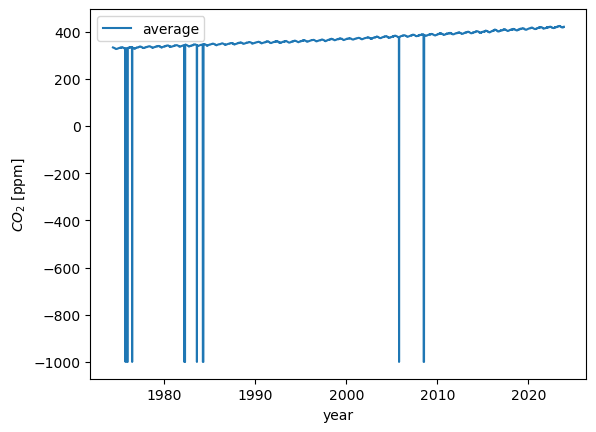

In [41]:
Mauna_Loa.plot(xlabel="year",ylabel="$CO_2$ [ppm]")
plt.show()

Oops! Looks like we need some data cleaning (notice the -999.9 above - this signifies missing data, it seems). Concentrations should be non-negative, so let's remove all the negative entries and replot.

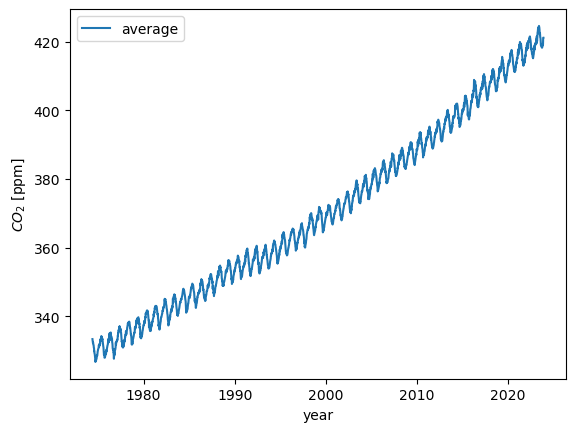

In [42]:
filtered=Mauna_Loa[Mauna_Loa["average"]>0] # doesn't this look easy?!?
filtered.plot(xlabel="year",ylabel="$CO_2$ [ppm]")
plt.show()

This looks a lot nicer.

The above is a fairly typical process when looking at real data. We need to inspect the data, select the right data sets (choose columns), understand the content, and possibly clean up some, remove outliers, deal with missing data, and the like.

We can see that there is
- a global trend,
- regular seasonal oscillations, and perhaps 
- residual noise

Courtesy of the module `statsmodels`, there is a simple function to do this all in one fell swoop!

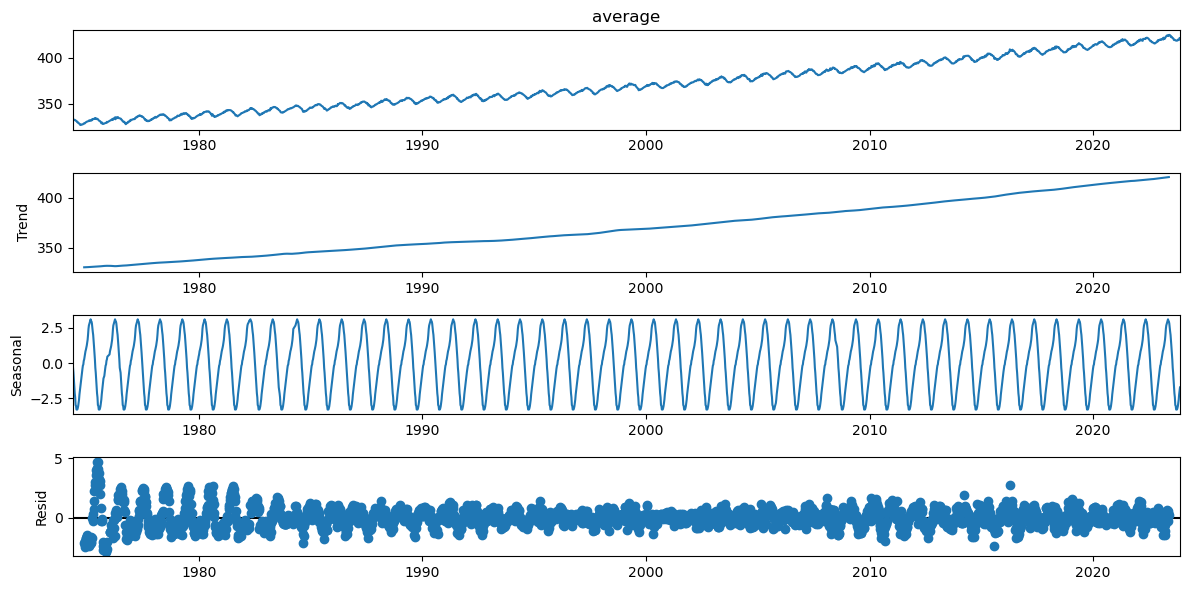

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams["figure.figsize"]=(12,6) # change the figure size to see things better
seasonal_decompose(pd.Series(filtered["average"]),model="additive",period=52).plot()
plt.show()

Impressive, isn't it?

OK, let us try to do this by hand. We have yearly oscillations, let's take rolling over 52 weeks to get the average over one year.

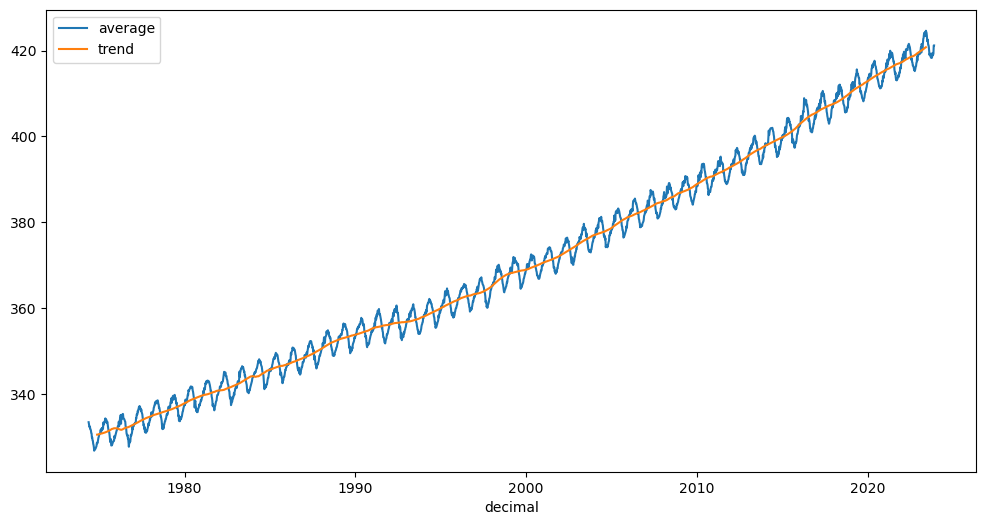

In [44]:
Mauna_Loa_cleaned=filtered[["average"]]
Mauna_Loa_cleaned["trend"]=Mauna_Loa_cleaned["average"].rolling(52,center=True).mean()
Mauna_Loa_cleaned.plot()
plt.show()

You see, I just added a column labelled "trend" and simply plot the whole dataframe. The orange line follows the blue oscillating curve nicely. 

If you look closely, you can observe tht the orange line does not extend across the full date range. The reason is that it needs enough data points to compute a rolling mean, and thus 26 weeks are missing on both ends.

Next, I am interested in the difference, so I create another column with label "detrended" and enter the difference between "average" and "trend". 

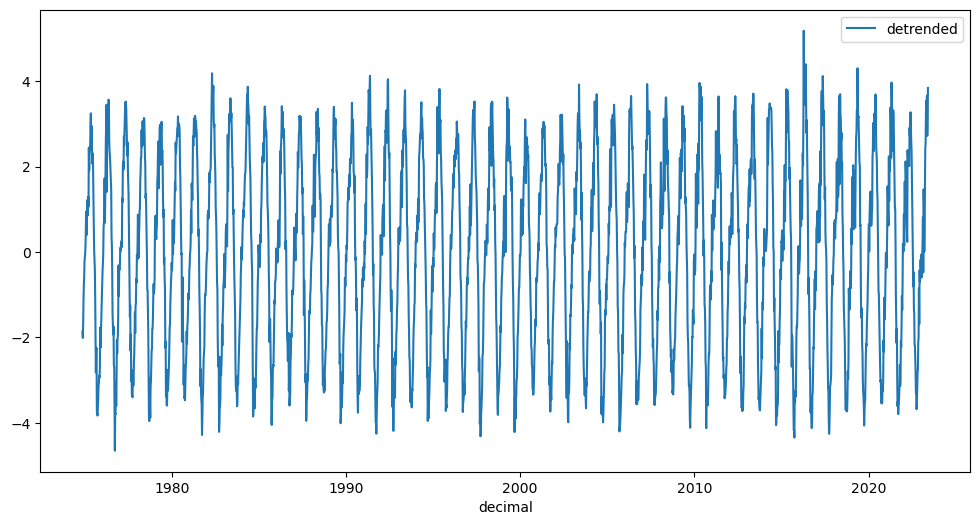

In [45]:
Mauna_Loa_cleaned["detrended"]=Mauna_Loa_cleaned["average"]-Mauna_Loa_cleaned["trend"]
Mauna_Loa_cleaned[["detrended"]].plot()
plt.show()

Now get the seasonal effects by taking means over each week of the year (I admit, this is a bit complicated, I needed some serious Googling to do this in just two lines).

In [46]:
Mauna_Loa_cleaned["week"]=(52*(Mauna_Loa_cleaned.index%1)).astype(int) # extract the week from the index values
Mauna_Loa_cleaned["seasonality"]=Mauna_Loa_cleaned.groupby("week")["detrended"].transform("mean") # take averages over each week (across all 50 years)
Mauna_Loa_cleaned # Note the NaN values for the undefined rolling averages at beginning and end

,average,trend,detrended,week,seasonality
decimal,,,,,
1974.3795,333.37,NaN,NaN,19,3.213921
1974.3986,332.95,NaN,NaN,20,3.204274
1974.4178,332.35,NaN,NaN,21,2.957610
1974.4370,332.20,NaN,NaN,22,2.669700
1974.4562,332.37,NaN,NaN,23,2.356775
...,...,...,...,...,...
2023.8068,418.91,NaN,NaN,41,-3.116506
2023.8260,419.05,NaN,NaN,42,-2.890304
2023.8452,419.28,NaN,NaN,43,-2.589752


Plotting this shows a very nice periodic signal - of course the same for every year, the way we have computed it.

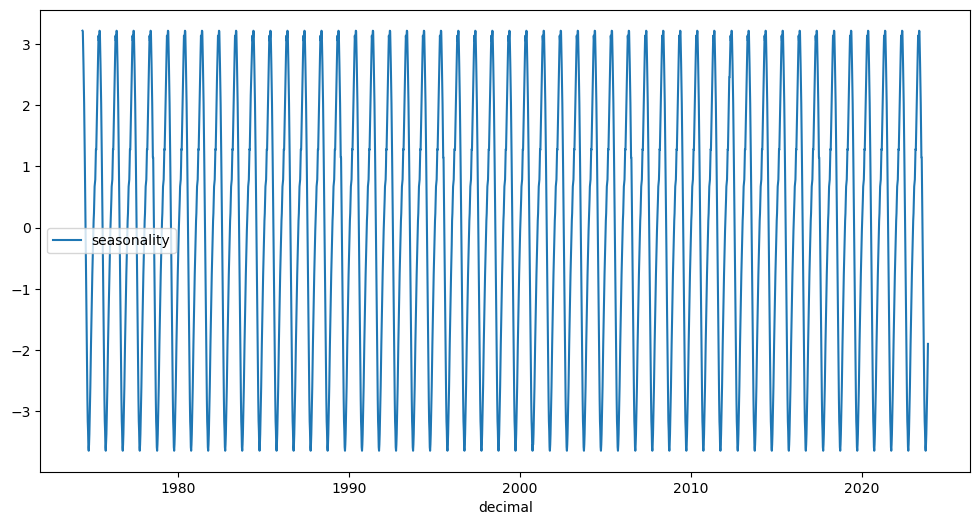

In [47]:
Mauna_Loa_cleaned[["seasonality"]].plot()
plt.show()

Finally, look at what's left (the residual noise):

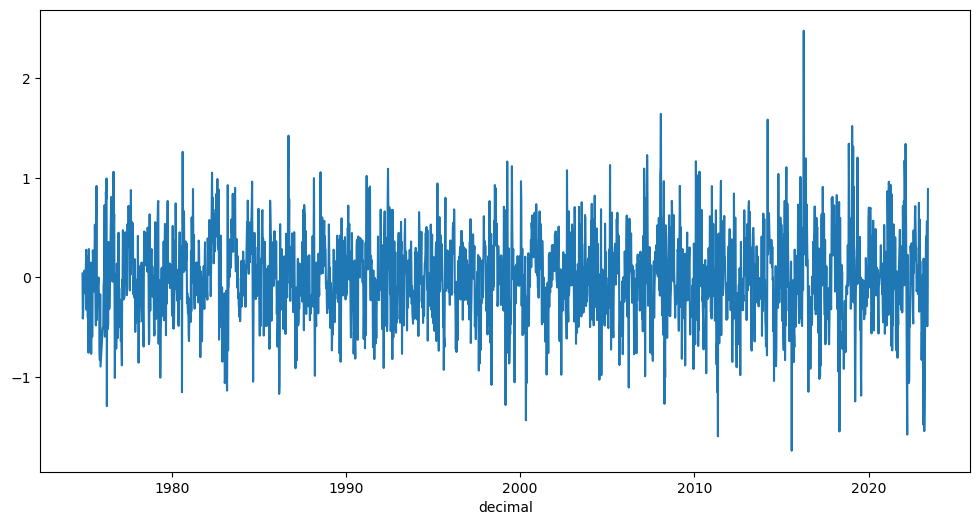

In [48]:
Mauna_Loa_cleaned["residual"]=Mauna_Loa_cleaned["average"]-Mauna_Loa_cleaned["trend"]-Mauna_Loa_cleaned["seasonality"]
Mauna_Loa_cleaned["residual"].plot()
plt.show()

This looks much better than the black-box method: the periodicity of the seasonal data is clear, and the residual noise does not have any visible structure left.

To finish, let's mimic the plot from the black box function.

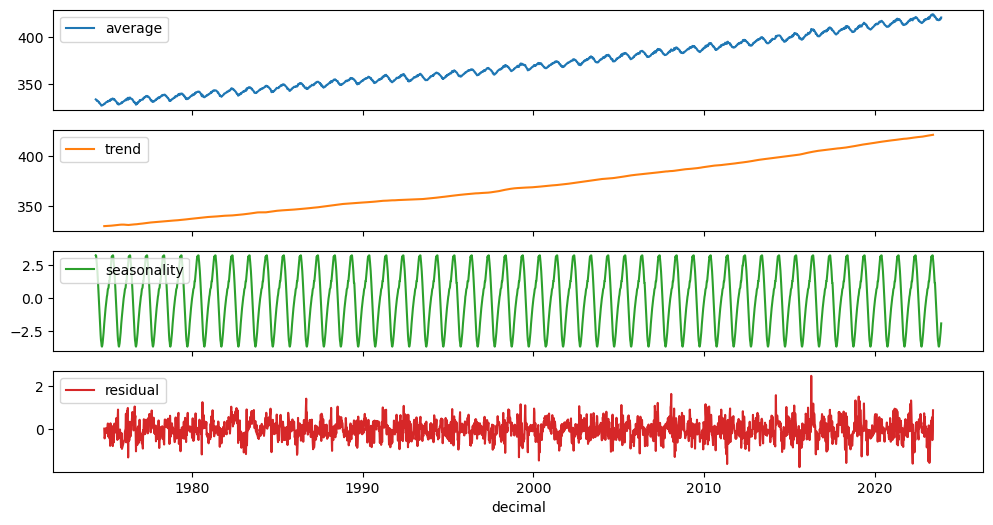

In [49]:
Mauna_Loa_cleaned.loc[:, ["average","trend","seasonality","residual"]].plot(subplots=True)
plt.show()

**Note: The previous example was all pretty much what I would call black-box coding: you simply chain together some high level functions that do some stuff you don't really know much about in detail, all in a very linear fashion. In other words, there isn't really any proper programming involved. Still, the existence of these high-level functions is what makes Python so incredibly useful!** 

Practically, all you need is Google and some trial-and-error guesswork.

## Conclusion and Outlook

In this lecture we introduced the basics of dealing with arrays in Python and looked at solving systems of linear equations. We then provided a glimpse of Pandas, to be continued next week.